<a href="https://colab.research.google.com/github/Geeth-Rath/Rice_Plant_Diseases_Detection/blob/rice_plant_nutrients_defficiency/Nutrient_deficiency_Proposed_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow

In [ ]:
# Remove.bg API key
# api_key = 'kojSgBU89cWYMKdN1nN957Sq'

api_key ='PXyVGpvPLGXszGJkdm5VGHfx'

In [ ]:
# Define the color ranges for green and yellow in HSV to identify Nitrogen
green_lower_1 = np.array([50, 40, 40])
green_upper_1 = np.array([138, 255, 255])

yellow_lower_1 = np.array([20, 40, 40])
yellow_upper_1 = np.array([50, 255, 255])


In [ ]:
# Define the color ranges for green and yellow in HSV to identidy phosperous and Potassium
green_lower_2 = np.array([36, 65, 125])
green_upper_2 = np.array([138, 255, 255])

yellow_lower_2 = np.array([0, 0, 20])
yellow_upper_2 = np.array([29, 255, 255])

In [ ]:
image_path = "/content/drive/MyDrive/FinalImages/Nutrient_deffiency_Images/Nitrogen/untitled-100.JPG"

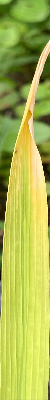

In [ ]:
# Load the image
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (50, 400))
cv2_imshow(resized_image)


# bgRemove

In [ ]:
def remove_background(image_path, api_key):
    api_url = 'https://api.remove.bg/v1.0/removebg'
    headers = {
        'X-Api-Key': api_key,
    }
    data = {
        'image_file': open(image_path, 'rb'),
        'size': 'auto',
    }

    response = requests.post(api_url, headers=headers, files=data)

    if response.status_code == requests.codes.ok:
        with open('output.png', 'wb') as output_file:
            output_file.write(response.content)
        return 'output.png'
    else:
        print(f'Error: {response.status_code} {response.text}')
        return None

# load image

In [ ]:
def load_image(image_path, api_key):

    image = cv2.imread(image_path)

    image_path = remove_background(image_path, api_key)
    if image_path is None:
        return None

    image = cv2.imread(image_path)
    return image

# convert to HSV

In [ ]:
def convert_to_hsv(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv


# Split image

In [ ]:
def split_image(hsv):
    height, width, _ = hsv.shape
    split_y = height // 2
    first_half = hsv[:split_y, :] # upper half
    second_half = hsv[split_y:, :] # Lower half
    return first_half, second_half

# Create mask

In [ ]:
def create_color_mask(image, lower_bound, upper_bound):
    mask = cv2.inRange(image, lower_bound, upper_bound)
    return mask

# Count pixels

In [ ]:
def count_non_zero_pixels(mask):
    count = cv2.countNonZero(mask)
    return count

# Color ratio

In [ ]:
def calculate_color_ratios(green_pixels, yellow_pixels):
    if green_pixels == 0:
        green_pixels = 1
    if yellow_pixels == 0:
        yellow_pixels = 1
    green_ratio = (green_pixels / (green_pixels + yellow_pixels)) * 100
    yellow_ratio = (yellow_pixels / (green_pixels + yellow_pixels)) * 100
    return green_ratio, yellow_ratio

# detect defficency

In [ ]:
def detect_deficiency(image_path, api_key):
    image = load_image(image_path, api_key)

    if image is None:
        print("Failed to load the image or remove the background.")
        return

    # Convert the image to HSV color space
    hsv = convert_to_hsv(image)

    # Split the image into top and bottom halves
    first_half, second_half = split_image(hsv)

    # Create masks for each color range in the Upper half
    green_mask_first = create_color_mask(first_half, green_lower_1, green_upper_1)
    yellow_mask_first = create_color_mask(first_half, yellow_lower_1, yellow_upper_1)

    # Create masks for each color range in the Lower half
    green_mask_second = create_color_mask(second_half, green_lower_1, green_upper_1)
    yellow_mask_second = create_color_mask(second_half, yellow_lower_1, yellow_upper_1)


    # Calculate the number of pixels in each color range for the upper half
    green_pixels_first = count_non_zero_pixels(green_mask_first)
    yellow_pixels_first = count_non_zero_pixels(yellow_mask_first)

    # Calculate the number of pixels in each color range for the Lower half
    green_pixels_second = count_non_zero_pixels(green_mask_second)
    yellow_pixels_second = count_non_zero_pixels(yellow_mask_second)

    # Calculate the green and yellow color ratios for the upper half
    green_ratio_first, yellow_ratio_first = calculate_color_ratios(green_pixels_first, yellow_pixels_first)

    # Calculate the green and yellow color ratios for the Lower half
    green_ratio_second, yellow_ratio_second = calculate_color_ratios(green_pixels_second, yellow_pixels_second)


    # Check the first condition with initial color ranges
    if yellow_ratio_first > 90 and green_ratio_first < 1 and yellow_ratio_second > 90 and green_ratio_second < 1:
        print("Nitrogen Deficiency")
    else:


        # Create masks for each color range in the upper half with updated color ranges
        green_mask_first = create_color_mask(first_half, green_lower_2, green_upper_2)
        yellow_mask_first = create_color_mask(first_half, yellow_lower_2, yellow_upper_2)

        # Calculate the number of pixels in each color range for the upper half with updated color ranges
        green_pixels_first = count_non_zero_pixels(green_mask_first)
        yellow_pixels_first = count_non_zero_pixels(yellow_mask_first)

        # Calculate the green and yellow color ratios for the upper half with updated color ranges
        green_ratio_first, yellow_ratio_first = calculate_color_ratios(green_pixels_first, yellow_pixels_first)

        # Create masks for each color range in the Lower half with updated color ranges
        green_mask_second = create_color_mask(second_half, green_lower_2, green_upper_2)
        yellow_mask_second = create_color_mask(second_half, yellow_lower_2, yellow_upper_2)

        # Calculate the number of pixels in each color range for the Lower half with updated color ranges
        green_pixels_second = count_non_zero_pixels(green_mask_second)
        yellow_pixels_second = count_non_zero_pixels(yellow_mask_second)

        # Calculate the green and yellow color ratios for the Lower half with updated color ranges
        green_ratio_second, yellow_ratio_second = calculate_color_ratios(green_pixels_second, yellow_pixels_second)

        # Check the second condition with updated color ranges
        if yellow_ratio_first < 50 and green_ratio_first > 55 and yellow_ratio_second < 30 and green_ratio_second > 70:
            print("Potassium Deficiency")
        elif yellow_ratio_first > 35 and green_ratio_first < 65 and yellow_ratio_second < 30 and green_ratio_second > 75:
            print("Phosphorus Deficiency")


In [ ]:
detect_deficiency(image_path, api_key)

Nitrogen Deficiency
